# SVM

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [6]:
IMAGE_SIZE = 64

X = np.load("./data/X.npy")
X = X.reshape(len(X), 64*64) # mise a plat de l image

y_ = np.load("./data/Y.npy")

# Équivalence encodage/traduction
dic_equiv = {0:9, 1:0, 2:7, 3:6, 4:1, 5:8, 6:4, 7:3, 8:2 , 9:5} 

y = np.zeros(len(y_))
for k in range(len(y)):
    a = y_[k]
    y[k] = int(dic_equiv[np.where(a==1)[0][0]])
y = y.astype(int)

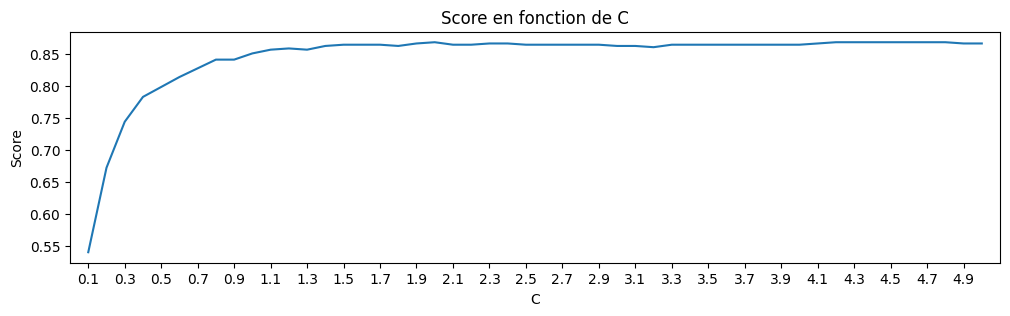

Score du meilleur modèle (avec C: 2.0): 0.87


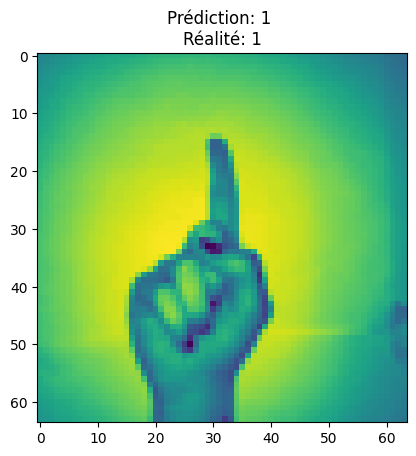

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=420)

svms = []
scores = []
C_max = 5.1

for c in np.arange(0.1, C_max, 0.1):
    svm = SVC(C=c)
    svm.fit(X_train, y_train)
    svms.append(svm)

    score = svm.score(X_test, y_test)
    scores.append(score)

plt.figure(figsize=(12, 3))
plt.plot(np.arange(0.1, C_max, 0.1), scores)
plt.title("Score en fonction de C")
plt.xlabel("C")
plt.ylabel("Score")
plt.xticks(np.arange(0.1, C_max, 0.2))
plt.xlim((0, C_max))
plt.show()

best_svm = svms[scores.index(max(scores))]
print(f"Score du meilleur modèle (avec C: {(scores.index(max(scores))+1)*0.1}): {max(scores):.2f}")

prediction = best_svm.predict([X_test[0]])
plt.imshow(X_test[0].reshape((IMAGE_SIZE, IMAGE_SIZE)))
plt.title(f"Prédiction: {prediction[0]} \nRéalité: {y_test[0]}")
plt.show()

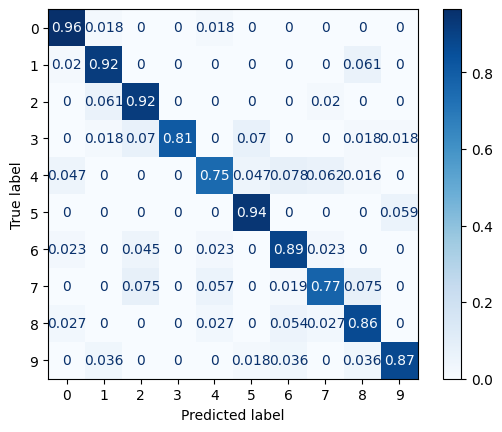

In [18]:
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, cmap=plt.cm.Blues, display_labels=range(0, 10), normalize="true")
plt.show()